# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

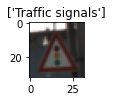

In [1]:
# Load pickled data
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
from skimage import transform
from skimage.filters import gaussian
import skimage.exposure
from PIL import Image, ImageEnhance
import cv2
import random
from itertools import combinations


# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

# Make sure the x, y have same shape for train, validation, and test images
assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(x_valid))
assert(len(x_test) == len(y_test))

# Get a random index
index = random.randint(0, len(x_train))

# Read in csv vile to match up description with image id
sign_id_df = pd.read_csv("./signnames.csv")
img_desc = sign_id_df[sign_id_df['ClassId'] == y_train[index]]['SignName'].values


# Show a random image from the dataset
plt.figure(figsize=(1,1))
plt.title(img_desc)
plt.imshow(x_train[index])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Text(0, 0.5, 'Number of Images')

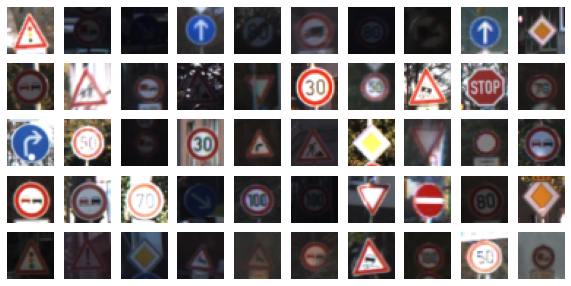

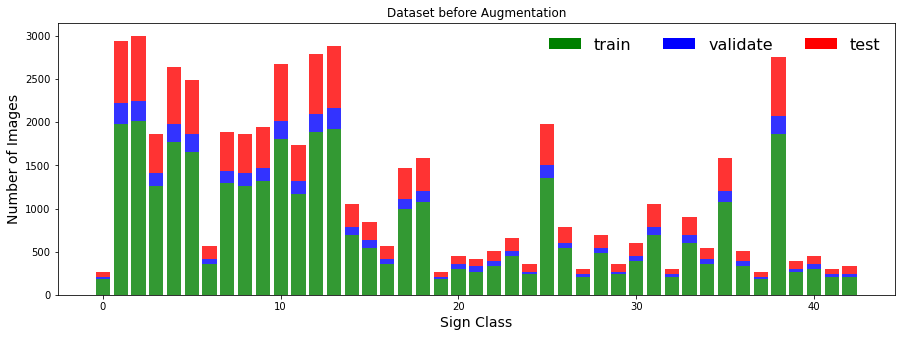

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import seaborn as sns
import collections
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot images
plt.figure(figsize=(10,5))
for i in range(50):
    # Get a random index
    index = random.randint(0, len(x_train))
    plt.subplot(5,10, i+1)
    plt.axis('off')
    plt.imshow(x_train[index])

# Dictionary to store number of images for each class in each dataset
data_count = {}
data_count['train_count'] = collections.Counter(y_train)
data_count['valid_count'] = collections.Counter(y_valid)
data_count['test_count'] = collections.Counter(y_test)

# Create a dataframe from above dictionary
df = pd.DataFrame.from_dict(data_count, orient='columns').reset_index()
df = df.rename(columns={'index':'ClassId'})

# Plot the 3 data sets on the same bar chart
plt.figure(figsize=(15,5))
train = plt.bar(df['ClassId'].values, df['train_count'].values, alpha=0.8, color='g')
valid = plt.bar(df['ClassId'].values, df['valid_count'].values, alpha=0.8, color='b', bottom=df['train_count'].values)
test = plt.bar(df['ClassId'].values, df['test_count'].values, alpha=0.8, color='r', bottom=df['train_count'].values + df['valid_count'].values)

# Create legend
topbar = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='b', edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='g',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['train', 'validate', 'test'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

plt.title('Dataset before Augmentation')
plt.xlabel('Sign Class', fontsize=14), 
plt.ylabel('Number of Images', fontsize=14)
# plt.savefig('Dataset_Visualization')

# plt.figure(figsize=(20,5))
# #sns.barplot(df['ClassId'].values, df['valid_count'].values, alpha=0.8)
# plt.title('Sign Type Distribution for Validation Dataset')
# plt.xlabel('Sign Class', fontsize=14)
# plt.ylabel('Number of Images', fontsize=14)
# plt.show()

# plt.figure(figsize=(20,5))
# #sns.barplot(df['ClassId'].values, df['test_count'].values, alpha=0.8)
# plt.title('Sign Type Distribution for Testing Dataset')
# plt.xlabel('Sign Class', fontsize=14)
# plt.ylabel('Number of Images', fontsize=14)
# plt.show()



### Sign Type Distribution 

Each dataset (train, validation, test) has a very similar distribution but each dataset has more images for sign ID's from 0-13. I will try augmenting images from smaller classes to see if this has any improvement in accuracy.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Convert images to Grayscale and Normalize

In [4]:
import skimage
import cv2
import tensorflow as tf

def preprocess(images):
    """
    This function preprocesses a give dataset of images
        1. Convert image to grayscale
        2. normalize image
    """
    
    # Create array for processed images
    processed_images = np.zeros((images.shape[0], images.shape[1], images.shape[2], 1), dtype='float32')
    
    for idx, image in enumerate(images):
        
        # Convert image to gray scale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Reshape array from 32x32 to 32x32x1
        gray = gray.reshape((32, 32, 1))

        # Normalize image with openCV
        #norm_img = cv2.normalize(gray, None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        # Manually normalize image
        norm_img = (gray - np.min(gray)) / (np.max(gray) - np.min(gray))

        # Shift the pixel values to be between -1 and 1
        #norm_img = 2 * norm_img - 1
        
        # Add processed image to array
        processed_images[idx] = norm_img
        
    return processed_images


### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Data Augmentation

Techniques:
* Flipping - Flip the image vertically or horizontall
* Rotation - Rotate image by specified degree
* Shearing - Shifts one part of the image like a parallelogram
* Cropping - Object appears in different positions in differen't proprotions in the image
* Zoom In
* Zoom Out
* Change Brightness
* Change Contrast

<class 'numpy.ndarray'>


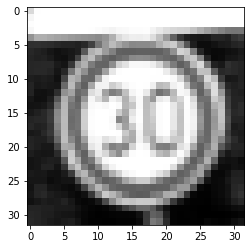

In [5]:
import skimage
from skimage import transform
from skimage.filters import gaussian
import skimage.exposure
from PIL import Image, ImageEnhance
import cv2
import random
from itertools import combinations
random.seed(5)

test_img = x_train[3002].astype('uint8').copy()
print(type(x_train))

def rotate_image(image, angle_threshold=10):
    """
    Function to rotate images randomly by +- angle_threshold degrees
    """
    angle = random.uniform(-angle_threshold, angle_threshold)
    #print("Rotation Angle: {}".format(angle))
    return transform.rotate(image, angle, preserve_range=True, mode='edge')

def blur_image(image):
    """
    Function to blur an image
    """
    sigma = random.uniform(0, 1)
    #print("Sigma: {}".format(sigma))
    return gaussian(image, sigma=(sigma, sigma), multichannel=True, preserve_range=True)

## NOT USED
def flip_image(image, direction='h'):
    """
    Function to flip image horizontally(h), vertically(v), horizontally and vertically(hv)
    """
    if direction == 'h':
        flip_code = 1
    if direction == 'v':
        flip_code = 0
    if direction =='hv' or direction =='vh':
        flip_code = -1     
    return cv2.flip(image, flip_code)

def shear_image(image, shear_angle_th=0.2):
    """
    Function to shear image
    """
    shear_angle = random.uniform(-shear_angle_th, shear_angle_th)
    #print("Shear Angle: {}".format(shear_angle))
    affine_tf = transform.AffineTransform(shear=shear_angle)
    
    return transform.warp(image, inverse_map=affine_tf, mode='edge', preserve_range=True)

def translate_image(image, pixle_range=2):
    """
    Function to translage image by x and y
    """
    x = random.randint(-pixle_range, pixle_range)
    y = random.randint(-pixle_range, pixle_range)
    #print("x translate: {}, y translate: {}".format(x,y))

    #Skimage
    tform = transform.SimilarityTransform(translation=(x, y))
    #translation_tf = transform.AffineTransform(translation=(x,y))
    return transform.warp(image, inverse_map=tform, mode='edge', preserve_range=True)

## ONLY WORKS ON RGB IMAGE
def adjust_gamma(image, gamma=1.0):
    image = image.astype('uint8')
    gamma = random.uniform(0.5, 1.5)
    #print("Gamma: {}".format(gamma))
    invGamma = 1.0 / gamma
    # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("float32")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)
    

def augment_image(image):
    """
    Function to apply random augmentation to an image
    """
    
    # Create total number of combinations for augmenting an image
    options = [1, 2, 3, 4, 5]
    total_combinations = []
    for i in range(1,6):
        all_combinations = combinations(options, i)
        for combo in all_combinations:
            total_combinations.append(combo)
    
    # Generate a random number to pick combination
    rand_num = random.randint(0,30)
    # Get combination
    curr_combo = total_combinations[rand_num]
    curr_combo = [1, 2, 3, 4, 5]

    # Adjust gamma
    if 1 in curr_combo:
        image = adjust_gamma(image)
        
    # Blur image   
    if 2 in curr_combo:
        image = blur_image(image)
        
    # Shear image    
    if 3 in curr_combo: 
        image = shear_image(image)
        
    # Translate image
    if 4 in curr_combo:
        image = translate_image(image)
        
    # Rotate image
    if 5 in curr_combo:
        image = rotate_image(image)
        
    return image
          

#########################################################
# Testing above functions individually
#########################################################

# tmp = augment_image(x_train[1])
# print(x_train[1].shape)
# print(tmp.shape)
# tmp = adjust_gamma(test_img)

# tmp = blur_image(tmp)

# tmp = shear_image(tmp)

# tmp = translate_image(tmp)

# tmp = rotate_image(tmp)


# Convert image to gray scale
gray = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

# Reshape array from 32x32 to 32x32x1
gray = gray.reshape((32, 32, 1))

# Normalize image with openCV
#norm_img = cv2.normalize(gray, None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Manually normalize image
norm_img = (gray - np.min(gray)) / (np.max(gray) - np.min(gray))

# Shift the pixel values to be between -1 and 1
norm_img = 2 * norm_img - 1

plt.figure()
#plt.imshow(tmp, cmap='gray')
plt.imshow(norm_img.squeeze(), cmap='gray')
# plt.savefig('preprocessed_image')

# plt.figure()
# plt.imshow(tmp)
# plt.savefig('preprocessed_image.jpg')



### Determine the number of augmented images each class needs

In [6]:
# Threshold for each class
sign_class_th = 2000

def sign_class_aug_count(threshold):
    # Get count for every label
    labels = collections.Counter(y_train)

    # dictionary storing number of augmented images each class needs
    sign_class_aug = {}

    for lable, count in labels.items():
        new_count = threshold - count
        if new_count > 0:
            sign_class_aug[lable] = new_count
        else:
            pass
    return sign_class_aug

sign_class_aug = sign_class_aug_count(sign_class_th)
print(sign_class_aug)


{41: 1790, 31: 1310, 36: 1670, 26: 1460, 23: 1550, 1: 20, 40: 1700, 22: 1670, 37: 1820, 16: 1640, 3: 740, 19: 1820, 4: 230, 11: 830, 42: 1790, 0: 1820, 32: 1790, 27: 1790, 29: 1760, 24: 1760, 9: 680, 5: 350, 38: 140, 8: 740, 10: 200, 35: 920, 34: 1640, 18: 920, 6: 1640, 13: 80, 7: 710, 30: 1610, 39: 1730, 21: 1730, 20: 1700, 33: 1401, 28: 1520, 12: 110, 14: 1310, 15: 1460, 17: 1010, 25: 650}


### Create augmented images for each sign class

In [7]:
def augment_dataset(x_train, y_train, sign_class_aug):
    # Counter to keep track of when a sign class is done 
    # being augmented and we need to move to the next sign class
    val_sum = 0
    
    # Lists to store to store agumented images and corresponding labels
    tmpx_aug = []
    tmpy_aug = []
    
    # Iterate through the sign_class_aug dictionary
    # dictionary structure:
    # key: stores the sign class id 
    # value: stores number of images that need to be augmented
    for key, val in sign_class_aug.items():
        # Get x_train for each lable
        x_aug = x_train[np.where(y_train == key)]
        # Increment val_sum by number
        val_sum += val
        # Augment dataset
        while len(tmpx_aug) != val_sum:
            # Loop through images in sign class
            for idx, image in enumerate(x_aug):
                # Augment image
                test_img = augment_image(image)
                # Check new agumented image is same shape
                assert(test_img.shape == image.shape)
                # Append augmented image to list
                tmpx_aug.append(test_img)
                # Append label to list
                tmpy_aug.append(key)
                # Check if augmentation is complete for current sign class
                if len(tmpx_aug) == val_sum:
                    print("Done Augmenting Sign Class: {}".format(key))
                    break
    # Return lists          
    return tmpx_aug, tmpy_aug

# Test augment dataset function
# tmpx_aug, tmpy_aug = augment_dataset(x_train, y_train, sign_class_aug)

# # Check that lists are same length
# assert(len(tmpx_aug) == len(tmpy_aug))

            

In [8]:
# Convert list to numpy array
x_train_aug = np.asarray(tmpx_aug)
y_train_aug = np.asarray(tmpy_aug)

print(x_train_aug.shape)

NameError: name 'tmpx_aug' is not defined

### Dataset Visualization after Data Augmentation

In [ ]:
num = 5000
plt.figure()
plt.imshow(x_train[num])

plt.figure()
plt.imshow(x_train_aug[num].astype(np.uint8))

# Dictionary to store number of images for each class in each dataset
data_count = {}
data_count['train_count'] = collections.Counter(y_train)
data_count['train_aug_count'] = collections.Counter(y_train_aug)
data_count['valid_count'] = collections.Counter(y_valid)
data_count['test_count'] = collections.Counter(y_test)

# Create a dataframe from above dictionary
df = pd.DataFrame.from_dict(data_count, orient='columns').reset_index()
df = df.rename(columns={'index':'ClassId'})

# Plot the 3 data sets on the same bar chart
plt.figure(figsize=(15,5))
train = plt.bar(df['ClassId'].values, df['train_count'].values, alpha=0.8, color='g')
train_aug = plt.bar(df['ClassId'].values, df['train_aug_count'].values, alpha=0.8, color='orange', bottom=df['train_count'].values)
valid = plt.bar(df['ClassId'].values, df['valid_count'].values, alpha=0.8, color='b', bottom=df['train_count'].values + df['train_aug_count'].values)
test = plt.bar(df['ClassId'].values, df['test_count'].values, alpha=0.8, color='r', bottom=df['train_count'].values + df['train_aug_count'].values + df['valid_count'].values)

# Create legend
topbar = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
middlebar2 = plt.Rectangle((0,0),1,1,fc='orange', edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='b', edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='g',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar2, middlebar, topbar], ['train', 'train_aug', 'validate', 'test'], loc=1, ncol = 4, prop={'size':16})
l.draw_frame(False)

plt.title('Dataset after Augmentation')
plt.xlabel('Sign Class', fontsize=14), 
plt.ylabel('Number of Images', fontsize=14)
plt.savefig("augmented_dataset")
plt.show()


### Concatenate train dataset with augmented train dataset and save to a pickle file to open later

In [9]:
#####################
### JUST FOR TESTING
######################
## Append train and train_aug datasets together
# x_train_aug = x_train_aug.astype('uint8')
# y_train_aug = y_train_aug.astype('uint8')

# x_train_dataset = np.concatenate((x_train, x_train_aug), 0)
# y_train_dataset = np.concatenate((y_train, y_train_aug), 0)

# assert(x_train_dataset.shape[0] == y_train_dataset.shape[0])

# pp_x_train_dataset = preprocess(x_train_dataset)

# train_w_aug = {}

# train_w_aug['features'] = pp_x_train_dataset
# train_w_aug['labels'] = y_train_dataset

# fh = open('train_w_aug.p', 'wb')

# pickle.dump(train_w_aug, fh)
# fh.close()


### Test opening the dataset pickle file just created above

In [10]:
def load_dataset_w_augmentation(data_file):   
    # Open the pickle file that was just saved
    with open(data_file, mode='rb') as f:
        train_dataset = pickle.load(f)

    x_train, y_train = train_dataset['features'], train_dataset['labels']
    return x_train, y_train
    


### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import math

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
  
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1, name='convolution0')
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2, name='convolution2')

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #Include L2 regularization 
    L2_norm = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + \
                tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)
    
    
    return logits, L2_norm


In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import math

def LeNet_mod(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
  
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # TODO: Layer 2: Convolutional. Output = 10x10x90.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 90), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(90))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x90. Output = 5x5x90.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')

    # TODO: Flatten. Input = 5x5x50. Output = 1250.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 2250. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2250,400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    
    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 6: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #Include L2 regularization 
    L2_norm = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + \
                tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)
    
    
    return logits, L2_norm


### START PROCESSING PIPLINE
## Load training data and augment images

In [13]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
from skimage import transform
from skimage.filters import gaussian
import skimage.exposure
from PIL import Image, ImageEnhance
import cv2
import random
from itertools import combinations
import pickle
from sklearn.model_selection import train_test_split
#import keras
random.seed(5)

# Augment dataset flag
NEW_AUGMENT = False
AUGMENT = True


# Each sign class will get augmented until the number of images for
# that sign class reach this threshold
aug_threshold = 2000

data_file = 'train_w_' + str(aug_threshold) + '_aug.p'

# Path to training data pickle files
training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

# Load training data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Seperate features and labels
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

# preprocess the test dataset
x_test = preprocess(x_test).astype('float32')

# Use dataset with aumentation
if AUGMENT:
    # Create new augmented dataset
    if NEW_AUGMENT:
        # Concatenate train and validation data
        x_train = np.concatenate((x_train, x_valid), 0).astype('float32')
        y_train = np.concatenate((y_train, y_valid), 0).astype('int32')
        y_test = y_test.astype('int32')

        # Set up numpy arrays for augmented data
        x_train_aug = np.empty([x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]])
        y_train_aug = np.empty([x_train.shape[0]])

        # Get number of augmented images for each sign class
        sign_class_aug = sign_class_aug_count(aug_threshold)

        # Augment the dataset
        tmpx_aug, tmpy_aug = augment_dataset(x_train, y_train, sign_class_aug)

        # Check that the number of augmented features matches the number of labels
        assert(len(tmpx_aug) == len(tmpy_aug))

        # Convert list of images to np array
        x_train_aug = np.asarray(tmpx_aug)
        y_train_aug = np.asarray(tmpy_aug)

        print("Total number of training examples: {}".format(len(x_train_aug) + (len(x_train))))

        # Concatenate original training dataset with augmented dataset
        x_train_dataset = np.concatenate((x_train, x_train_aug), 0)
        y_train_dataset = np.concatenate((y_train, y_train_aug), 0)

        assert(x_train_dataset.shape[0] == y_train_dataset.shape[0])

        # Preprocess the dataset
        pp_x_train_dataset = preprocess(x_train_dataset)

        train_w_aug = {}

        train_w_aug['features'] = pp_x_train_dataset
        train_w_aug['labels'] = y_train_dataset

        # Save preprocessed and augmented training dataset to pickle file
        fh = open('train_w_' + str(aug_threshold) + '_aug.p', 'wb')
        pickle.dump(train_w_aug, fh)
        fh.close()
        
    # Load pickle file of training dataset with augmented images
    x_train, y_train = load_dataset_w_augmentation(data_file)
    print("Total number of training examples: {}".format(len(x_train)))
    
    # Get randomized datasets for training and validation
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.05, random_state=832289)
else:

    x_train = preprocess(x_train).astype('float32')
    x_valid = preprocess(x_valid).astype('float32')
    print("Total number of training examples: {}".format(len(x_train)))


Total number of training examples: 86810


In [14]:
def evaluate(x_data, y_data, prob=1.0):
    num_examples = len(x_data)
    n_batches = math.ceil(num_examples/BATCH_SIZE)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_loss / num_examples, total_accuracy / num_examples)

In [15]:
# import tensorflow as tf
# import datetime, os
# %load_ext tensorboard

# logs_base_dir = "./logs"
# os.makedirs(logs_base_dir, exist_ok=True)
# %tensorboard --logdir {logs_base_dir}

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
# from tqdm import tqdm
import json
import os
import timeit
from tqdm import tqdm

start_time = timeit.default_timer()



# HYPERPARAMETERS
EPOCHS = 25
BATCH_SIZE = 120
L_RATE = 0.001
BETA = 0.001 # Used for L2 Normilization (prevent overfitting)
keep_prob = tf.placeholder(tf.float32, name='keep_prob') # probability to keep units
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Create a dictionary to save hyper parameters for run
hyper_p = {}
hyper_p['Training Samples'] = len(x_train)
hyper_p['EPOCHS'] = EPOCHS
hyper_p['BATCH_SIZE'] = BATCH_SIZE
hyper_p['L_RATE'] = L_RATE
hyper_p['BETA'] = BETA

model_str = 'mod2_lenet_L2_Drop_relu3/mod2_lenet_relu_augmentation'

logits, L2_norm = LeNet_mod(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = L_RATE)
training_operation = optimizer.minimize(loss_operation + BETA*L2_norm)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


training_accuracy = []
training_loss = []
validation_accuracy = []
validation_loss = []

config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
# Train Model
with tf.Session(config=config) as sess:
    # Initialize TF variables
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    print("Training Model...")
    for i in tqdm(range(EPOCHS), total=EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        # Losses and Accuracies
        train_loss, train_accuracy = evaluate(x_train, y_train)
        valid_loss, valid_accuracy = evaluate(x_valid, y_valid)
        
        training_accuracy.append(train_accuracy*100)
        training_loss.append(train_loss*100)
        
        validation_accuracy.append(valid_accuracy*100)
        validation_loss.append(valid_loss*100)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Training Loss = {:.3f}".format(train_loss))
        print("Validation Accuracy = {:.3f}".format(valid_accuracy))
        print("Validation Loss = {:.3f}".format(valid_loss))
        print()
        
    saver.save(sess, './models/' + model_str)
    
    hyper_p['Training Accuracy'] = train_accuracy
    hyper_p['Training Loss'] = train_loss
    hyper_p['Validation Accuracy'] = valid_accuracy
    hyper_p['Validation Loss'] = valid_loss
    
    # Evalute on Test Dataset
    fld_path = model_str.split('/')[0]
    
    # Evaluate model
    with tf.Session() as sess:
        # Load model from last checkpoint
        saver.restore(sess, tf.train.latest_checkpoint(os.path.join('./models/', fld_path)))
        # Evaluate model on test data
        test_loss, test_accuracy = evaluate(x_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Loss Accuracy = {:.3f}".format(test_loss))
    
    hyper_p['Test Accuracy'] = test_accuracy
    hyper_p['Test Loss'] = test_loss
    
    with open('./models/' + model_str + '.log', 'w') as file:
        file.write(json.dumps(hyper_p))
    print("Model saved")
    print("Training Complete")

elapsed = timeit.default_timer() - start_time
print("Time Elapsed: {}".format(elapsed))

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro T2000, pci bus id: 0000:01:00.0, compute capability: 7.5



  0%|                                                                                                                                              | 0/25 [00:00<?, ?it/s]

Training Model...


  4%|█████▎                                                                                                                                | 1/25 [00:08<03:24,  8.52s/it]

EPOCH 1 ...
Training Accuracy = 0.934
Training Loss = 0.292
Validation Accuracy = 0.924
Validation Loss = 0.326



  8%|██████████▋                                                                                                                           | 2/25 [00:15<03:03,  7.98s/it]

EPOCH 2 ...
Training Accuracy = 0.976
Training Loss = 0.116
Validation Accuracy = 0.969
Validation Loss = 0.139



 12%|████████████████                                                                                                                      | 3/25 [00:21<02:45,  7.53s/it]

EPOCH 3 ...
Training Accuracy = 0.983
Training Loss = 0.079
Validation Accuracy = 0.975
Validation Loss = 0.108



 16%|█████████████████████▍                                                                                                                | 4/25 [00:28<02:31,  7.21s/it]

EPOCH 4 ...
Training Accuracy = 0.988
Training Loss = 0.058
Validation Accuracy = 0.980
Validation Loss = 0.080



 20%|██████████████████████████▊                                                                                                           | 5/25 [00:34<02:21,  7.08s/it]

EPOCH 5 ...
Training Accuracy = 0.989
Training Loss = 0.056
Validation Accuracy = 0.981
Validation Loss = 0.076



 24%|████████████████████████████████▏                                                                                                     | 6/25 [00:41<02:11,  6.91s/it]

EPOCH 6 ...
Training Accuracy = 0.988
Training Loss = 0.056
Validation Accuracy = 0.981
Validation Loss = 0.078



 28%|█████████████████████████████████████▌                                                                                                | 7/25 [00:48<02:02,  6.82s/it]

EPOCH 7 ...
Training Accuracy = 0.992
Training Loss = 0.048
Validation Accuracy = 0.986
Validation Loss = 0.065



 32%|██████████████████████████████████████████▉                                                                                           | 8/25 [00:54<01:53,  6.70s/it]

EPOCH 8 ...
Training Accuracy = 0.990
Training Loss = 0.041
Validation Accuracy = 0.985
Validation Loss = 0.063



 36%|████████████████████████████████████████████████▏                                                                                     | 9/25 [01:01<01:47,  6.70s/it]

EPOCH 9 ...
Training Accuracy = 0.989
Training Loss = 0.044
Validation Accuracy = 0.986
Validation Loss = 0.059



 40%|█████████████████████████████████████████████████████▏                                                                               | 10/25 [01:07<01:39,  6.64s/it]

EPOCH 10 ...
Training Accuracy = 0.993
Training Loss = 0.036
Validation Accuracy = 0.985
Validation Loss = 0.055



 44%|██████████████████████████████████████████████████████████▌                                                                          | 11/25 [01:14<01:33,  6.65s/it]

EPOCH 11 ...
Training Accuracy = 0.994
Training Loss = 0.031
Validation Accuracy = 0.988
Validation Loss = 0.048



 48%|███████████████████████████████████████████████████████████████▊                                                                     | 12/25 [01:20<01:25,  6.57s/it]

EPOCH 12 ...
Training Accuracy = 0.994
Training Loss = 0.032
Validation Accuracy = 0.987
Validation Loss = 0.052



 52%|█████████████████████████████████████████████████████████████████████▏                                                               | 13/25 [01:27<01:18,  6.50s/it]

EPOCH 13 ...
Training Accuracy = 0.995
Training Loss = 0.030
Validation Accuracy = 0.989
Validation Loss = 0.046



 56%|██████████████████████████████████████████████████████████████████████████▍                                                          | 14/25 [01:33<01:11,  6.50s/it]

EPOCH 14 ...
Training Accuracy = 0.995
Training Loss = 0.029
Validation Accuracy = 0.988
Validation Loss = 0.044



 60%|███████████████████████████████████████████████████████████████████████████████▊                                                     | 15/25 [01:40<01:05,  6.54s/it]

EPOCH 15 ...
Training Accuracy = 0.994
Training Loss = 0.032
Validation Accuracy = 0.988
Validation Loss = 0.049



 64%|█████████████████████████████████████████████████████████████████████████████████████                                                | 16/25 [01:46<00:58,  6.52s/it]

EPOCH 16 ...
Training Accuracy = 0.995
Training Loss = 0.027
Validation Accuracy = 0.989
Validation Loss = 0.043



 68%|██████████████████████████████████████████████████████████████████████████████████████████▍                                          | 17/25 [01:53<00:52,  6.56s/it]

EPOCH 17 ...
Training Accuracy = 0.996
Training Loss = 0.024
Validation Accuracy = 0.991
Validation Loss = 0.039



 72%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 18/25 [02:00<00:46,  6.62s/it]

EPOCH 18 ...
Training Accuracy = 0.994
Training Loss = 0.029
Validation Accuracy = 0.988
Validation Loss = 0.050



 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                | 19/25 [02:06<00:39,  6.64s/it]

EPOCH 19 ...
Training Accuracy = 0.994
Training Loss = 0.030
Validation Accuracy = 0.987
Validation Loss = 0.050



 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 20/25 [02:13<00:33,  6.66s/it]

EPOCH 20 ...
Training Accuracy = 0.993
Training Loss = 0.032
Validation Accuracy = 0.986
Validation Loss = 0.054



 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 21/25 [02:20<00:26,  6.62s/it]

EPOCH 21 ...
Training Accuracy = 0.993
Training Loss = 0.031
Validation Accuracy = 0.987
Validation Loss = 0.053



 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 22/25 [02:26<00:19,  6.55s/it]

EPOCH 22 ...
Training Accuracy = 0.995
Training Loss = 0.027
Validation Accuracy = 0.987
Validation Loss = 0.047



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 23/25 [02:32<00:13,  6.52s/it]

EPOCH 23 ...
Training Accuracy = 0.995
Training Loss = 0.029
Validation Accuracy = 0.990
Validation Loss = 0.049



 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 24/25 [02:39<00:06,  6.47s/it]

EPOCH 24 ...
Training Accuracy = 0.994
Training Loss = 0.029
Validation Accuracy = 0.990
Validation Loss = 0.042



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [02:45<00:00,  6.63s/it]

EPOCH 25 ...
Training Accuracy = 0.992
Training Loss = 0.035
Validation Accuracy = 0.987
Validation Loss = 0.052



INFO:tensorflow:Restoring parameters from ./models/mod2_lenet_L2_Drop_relu3\mod2_lenet_relu_augmentation
Test Accuracy = 0.954
Loss Accuracy = 0.202
Model saved
Training Complete
Time Elapsed: 168.4661479


In [50]:
# Evalute on Test Dataset
# fld_path = model_str.split('/')[0]
# print(fld_path)
# # Evaluate model
# with tf.Session() as sess:
#     # Load model from last checkpoint
#     saver.restore(sess, tf.train.latest_checkpoint('./models' + '/' + fld_path))
#     # Evaluate model on test data
#     test_loss, test_accuracy = evaluate(x_test, y_test)
#     print("Test Accuracy = {:.3f}".format(test_accuracy))
#     print("Loss Accuracy = {:.3f}".format(test_loss))
model_str = 'mod2_lenet_L2_Drop_relu2/mod_lenet_relu_augmentation'

### Plot Validation Accuracy

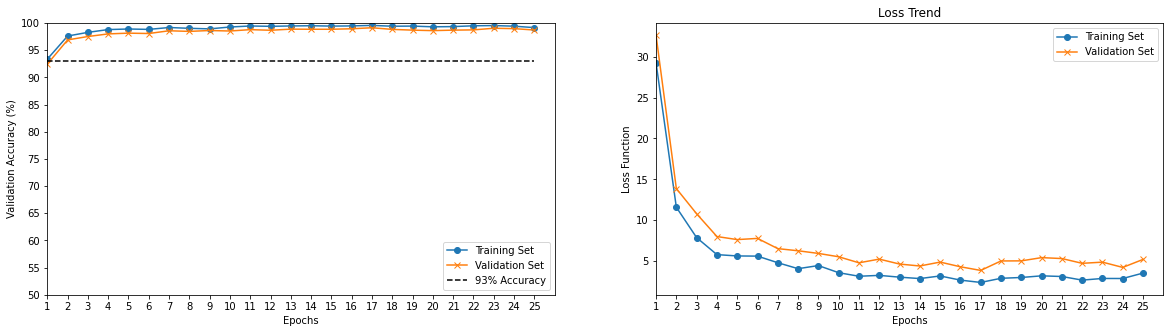

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(range(1, EPOCHS+1), training_accuracy, '-o', label='Training Set')
plt.plot(range(1, EPOCHS+1), validation_accuracy, '-x', label='Validation Set')
plt.plot(range(1,EPOCHS+1), [93]*EPOCHS, '--k', label = '93% Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy (%)')
plt.ylim(50, 100)
plt.xlim(1, EPOCHS+1)
plt.xticks(np.arange(1, EPOCHS+1, 1))
plt.yticks(np.arange(50,105,5))
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(1, EPOCHS+1), training_loss, '-o', label = 'Training Set')
plt.plot(range(1, EPOCHS+1), validation_loss, '-x', label = 'Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.xlim(1, EPOCHS+1)
plt.xticks(np.arange(1, EPOCHS+1, 1))
plt.title('Loss Trend')
plt.legend(loc = 'upper right')
plt.savefig(os.path.join('./models/', model_str))
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

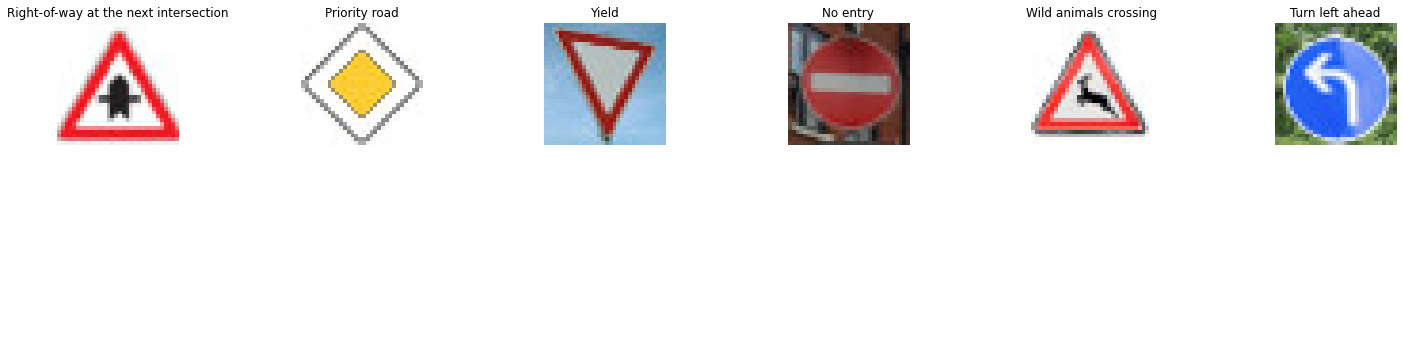

In [52]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images(images, labels):
    cols = 6
    rows = int(len(images)/cols)+1
    fig, axs = plt.subplots(rows, cols, figsize=(24,6))
    fig.subplots_adjust(hspace=0.2, wspace=1)
    axs = axs.ravel()
    
    for i in range(cols * rows):
        axs[i].axis('off')
        if i < len(images):
            img = images[i]
            axs[i].axis('off')
            axs[i].imshow(img)
            axs[i].set_title(sign_id_df['SignName'][sign_id_df['ClassId'] == int(labels[i])].iloc[0])

# Read in csv vile to match up description with image id
sign_id_df = pd.read_csv("./signnames.csv")


new_signs_path = './test_examples/'

x_test = []
y_test = []

for img in glob.glob(new_signs_path + '*.jpg'):
    image = np.array(mpimg.imread(img))
   
    # Get label for image
    label = img[len(new_signs_path):][:2]
    
    # Add image and label to list
    x_test.append(image)
    y_test.append(label)
    
show_images(x_test, y_test)

# Convert list to np array
x_test = np.array(x_test)
y_test = np.array(y_test)
# Preprocess the images
x_test_pp = preprocess(x_test)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./models/original_lenet_L2_Drop_relu2\original_lenet_relu_augmentation
Test Accuracy = 0.833
[30 12 13 17 31 34]


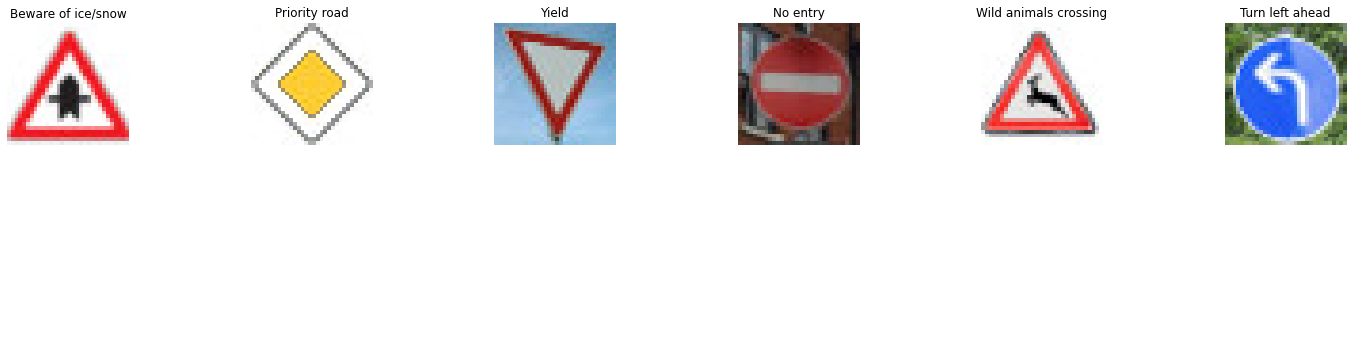

In [54]:
prediction=tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models' + '/' + fld_path))
    predictions = sess.run(prediction, feed_dict={x: x_test_pp, keep_prob: 1.0})
    test_loss, test_accuracy = evaluate(x_test_pp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    show_images(x_test, predictions)
    print(predictions)


### Analyze Performance

In [55]:
# Evaluate model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models' + '/' + fld_path))

    test_loss, test_accuracy = evaluate(x_test_pp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./models/original_lenet_L2_Drop_relu2\original_lenet_relu_augmentation
Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, 5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models' + '/' + fld_path))
    top_k = sess.run(top_k, feed_dict={x: x_test_pp, keep_prob : 1.0})
    
    
    
    
print(top_k.values)
print(top_k.indices)

INFO:tensorflow:Restoring parameters from ./models/original_lenet_L2_Drop_relu2\original_lenet_relu_augmentation
[[9.31670785e-01 6.83292001e-02 3.06171906e-08 1.61563900e-08
  4.42627268e-09]
 [9.99999404e-01 3.03030191e-07 2.25351044e-07 4.67139252e-08
  1.57102455e-08]
 [1.00000000e+00 1.06490330e-10 1.30737426e-11 7.51128586e-12
  2.12823682e-13]
 [9.99997258e-01 2.17656930e-06 4.50965700e-07 1.15654665e-07
  3.60951695e-08]
 [9.99974728e-01 1.47703749e-05 1.02597478e-05 2.01487950e-07
  1.46603272e-08]
 [9.99949455e-01 5.01009672e-05 3.31267188e-07 6.57177921e-08
  3.02826244e-08]]
[[30 11 20 16 31]
 [12 34 38 29 22]
 [13  2 32 14  3]
 [17 14 34  9 16]
 [31 29 23 21 19]
 [34 38 35 12 17]]


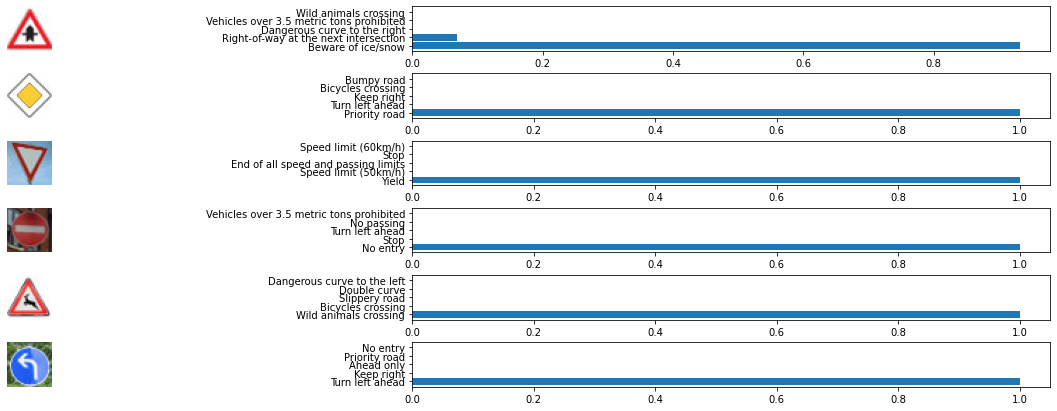

In [60]:
prob = top_k.values
label_ids = top_k.indices
assert(len(prob) == len(label_ids))
rows = len(label_ids)
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(24, 7))
fig.subplots_adjust(hspace=0.5, wspace=.1)
axs = axs.ravel()
i = 0
for row in range(6):
    axs[i].axis('off')
    axs[i].imshow(x_test[row])
    i += 1
    labs =[sign_id_df['SignName'][sign_id_df['ClassId'] == int(j)].iloc[0] for j in label_ids[row]]
    axs[i].barh(labs, prob[row])

    i += 1
    
plt.savefig('softmax_probabillities')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [61]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, conv_num=None):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    rows = image_input.shape[0]
    cols = 8

    fig = plt.figure(figsize=(24, 7))
    fig.suptitle('Convolution: {}'.format(conv_num), fontsize=16)
    for i in range(activation.shape[0]):
        fig = plt.figure(figsize=(24, 7))
        fig.suptitle('Feature Map Convolution: {}, Image: {}'.format(conv_num, i+1), fontsize=16)
        for featuremap in range(featuremaps):
            ax = fig.add_subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            ax.axis('off')
            if activation_min != -1 & activation_max != -1:
                ax.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                ax.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                ax.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                ax.imshow(activation[i,:,:, featuremap], interpolation="nearest", cmap="gray")
        


with tf.Session() as sess:

    saver.restore(sess, tf.train.latest_checkpoint('./models/original/'))
    conv1 = sess.graph.get_tensor_by_name('convolution0:0')
    outputFeatureMap(x_test_pp, conv1, activation_min=-1, activation_max=-1, plt_num=1, conv_num=0)
    
    conv1 = sess.graph.get_tensor_by_name('convolution1:0')
    outputFeatureMap(x_test_pp, conv1, activation_min=-1, activation_max=-1, plt_num=2, conv_num=1)
    
    conv2 = sess.graph.get_tensor_by_name('convolution2:0')
    outputFeatureMap(x_test_pp, conv2, activation_min=-1, activation_max=-1, plt_num=3, conv_num=2)
    
    conv2 = sess.graph.get_tensor_by_name('convolution3:0')
    outputFeatureMap(x_test_pp, conv2, activation_min=-1, activation_max=-1, plt_num=4, conv_num=3)

ValueError: Can't load save_path when it is None.